<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выводы-и-базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Выводы-и-базовые-рекомендации-по-работе-с-клиентами-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы и базовые рекомендации по работе с клиентами</a></span></li></ul></div>

# Анализ сети фитнес-центров «Культурист-датасаентист»

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 
Задача — провести анализ и подготовить план действий по удержанию клиентов.

Набор данных включает следующие поля:

Churn — факт оттока в текущем месяце;

Данные клиента за предыдущий до проверки факта оттока месяц:

gender — пол;

Near_Location — проживание или работа в районе, где находится фитнес-центр;

Partner — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент);

Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

Phone — наличие контактного телефона;

Age — возраст;

Lifetime — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

Contract_period — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);

Month_to_end_contract — срок до окончания текущего действующего абонемента (в месяцах);

Group_visits — факт посещения групповых занятий;

Avg_class_frequency_total — средняя частота посещений в неделю за все время с начала действия абонемента;

Avg_class_frequency_current_month — средняя частота посещений в неделю за предыдущий месяц;

Avg_additional_charges_total — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Общая информация о данных

Импортируем необходимые для работы библиотеки. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import numpy as np

Откроем предоставленные файлы и изучим общую информацию.

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Данные содержат 4000 строк и 14 столбцов. Пропущенные значений нет. Формат данных верный.

Завершая предобработку данных, проведем проверку на дубликаты.

In [3]:
data[data.duplicated()]

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn


Дубликатов не обнаружено

### Вывод

 Датасет готов к дальнейшему анализу.

## Исследовательский анализ данных

Изучим средние значения и стандартные отклонения.

In [4]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


gender минимальное значение 0, максимальное 1, все верно. Среднее равно 0,51, то есть значений равных 1 немного больше. 

Near_Location минимальное значение 0, максимальное 1, верно. Среднее равно 0,85, то есть значений равных 1 больше. 

Partner минимальное значение 0, максимальное 1, верно. Среднее равно 0,49, то есть значений равных 0 немного больше.

Promo_friends минимальное значение 0, максимальное 1, верно. Среднее равно 0,31, то есть значений равных 0 больше.

Phone минимальное значение 0, максимальное 1, верно. Среднее равно 0,9, то есть значений равных 1 больше. 

Contract_period минимальное значение 1, максимальное 12, верно. Среднее значение равно 4,68 месяцев. 

Group_visits минимальное значение 0, максимальное 1, верно. Среднее значение равно 0,41, то есть значений равных 0 больше

Age минимальное значение 18, максимальное 41. Средний возраст клиента 29,18 +- 3,26 лет.

Avg_additional_charges_total минимальное значение 0,15, максимальное 552,59. Среднее равно 146,94, стандартное отклонение 96,36. То есть клиенты в среднем потратили на дополнительные услуги 146,94 +/-96,36

Month_to_end_contract  минимальное значение 1, максимальное 12. Среднее равно 4,32, стандартное отклонение 4,19. То есть на данный момент у большинства клиентов срок до окончания текущего действующего абонемента 4,32 месяца +/-4,19 месяца

Lifetime минимальное значение 0, максимальное 31. Среднее равно 3,72, стандартное отклонение 3,75. То есть на данный момент большинство клиентов первый раз обратились в фитнес-центр 1,88 месяцев назад +/-0,97 месяца

Avg_class_frequency_total минимальное значение 0, максимальное 6,02. Среднее равно 1,88, стандартное отклонение 0,97. То есть большинство посещают тренажерный зал 1,88 раз в неделю +/-0,97

Avg_class_frequency_current_month минимальное значение 0, максимальное 6,15. Среднее равно 1,77, стандартное отклонение 1,05 То есть за предыдущий месяц клиенты посещали тренажерный зал 1,77 раз в неделю +/-1,05

churn минимальное значение 0, максимальное 1, верно. Среднее равно 0,27, то есть доля оттока равно 27%. 

Contract_period — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [5]:
data.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


gender Разделение по половому признаку почти равное и совпадает со средним значеним по всем клиенитам. Скорее всего данный признак не оказывает влияния на решения клиентов уйти или остаться

Near_Location Среди клиентов кто еще занимается, доля тех кто работает/живет рядом с фитнес-центром выше, чем среди тех кто ушел в отток. Видимо данный признак оказывает влияние на клиентов.

Partner сотрудников компаний-партнёра клуба больше в группе занимающихся. Возможно предположить зависимость данного признака на решение клиентов посещать фитнес-центр или нет.

Promo_friends В обеих группах небольшой процент клиентов используют акцию «приведи друга». В группе занимающихся он выше, видимо данный признак оказывает влияние.

Phone Большинство клиентов отставляют телефон. Среднее значение по группам одинаковое. Скорее всего признак не оказывает влияние на решение уйти или остаться.

Contract_period Средняя длительность текущего абонемента различается в группах. Для тех кто остался показатель равен 5,74, а для тех кто ущел 1,73. Скорее всего признак оказывает влияние

Group_visits — факт посещения групповых занятий скорее всего тоже оказывает влияние. В группе ущедхих клтиентов среднее значение ниже чем среди тех, кто остался.

Age — средний возраст клиентов в группе ушедщих ниже, чем среди тех кто остался. Возможно предположить зависимость данного признака на решение клиентов посещать фитнес-центр или нет. 

Avg_additional_charges_total лояльные клиенты больше тратят на дополнительные услуги. Видимо данный признак оказывает влияние.

Month_to_end_contract Среднее значение срок до окончания текущего действующего абонемента у клиентов которые посещают фитнес-центр в 3 раза выше, чем у тех кто ущел в отток. Данного признак оказывает влияние на решение клиентов посещать фитнес-центр или нет. 

Lifetime В группе лояльных клиентов среднее значение данного признака выше, предположим что он оказывает влияние на решение клиентов.

Avg_class_frequency_total и Avg_class_frequency_current_month в среднем клиенты, не ущедщие в отток, за неделю посещают фитнес-центр чаще чем те, кто ущел. Видимо данные признаки оказывают влияние.

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

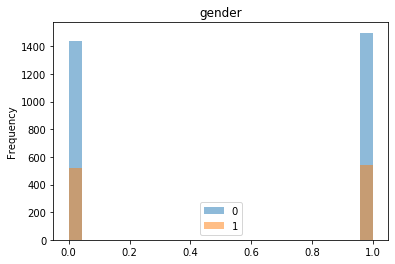

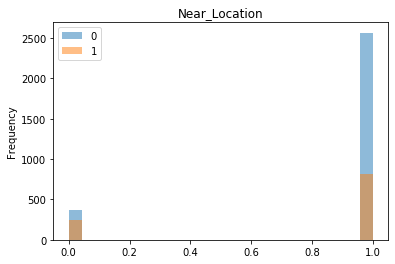

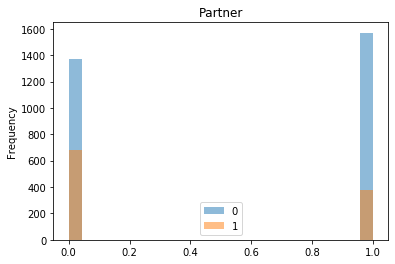

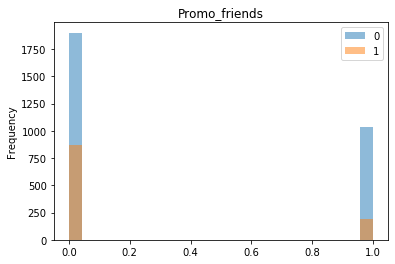

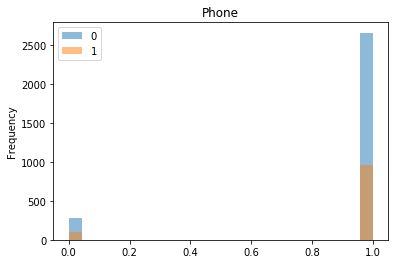

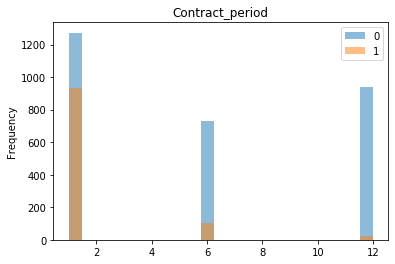

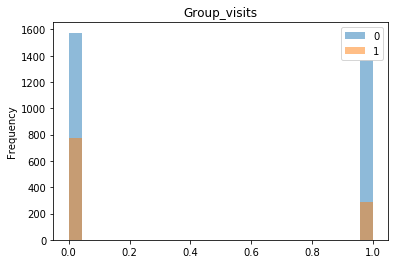

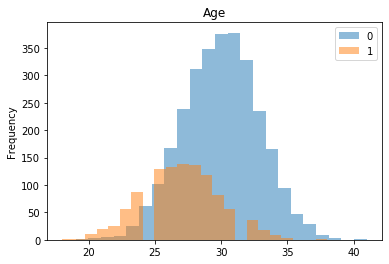

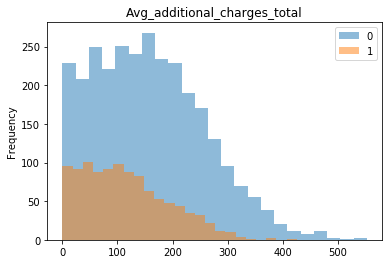

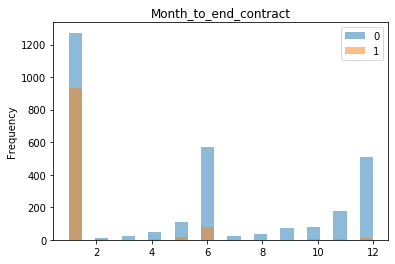

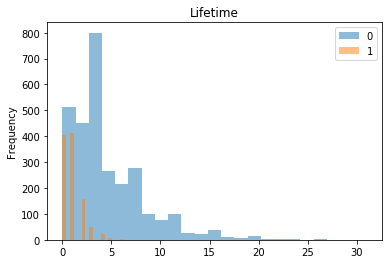

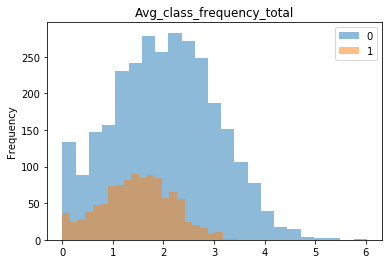

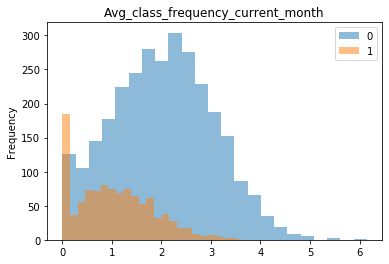

In [6]:
for i in data.drop('Churn', axis = 1).columns:
    data.groupby('Churn')[i].plot(kind = 'hist', bins = 23, alpha = 0.5)
    plt.title(str(i))
    plt.legend()
    plt.show()

gender График подтверждает, что скорее всего данный признак не оказывает влияния на решения клиентов уйти или остаться

Near_Location Большая часть клиентов кто не живет и не работает рядом с фитнес-центром уходят в отток.

Partner сотрудники компаний-партнёра клуба меньше уходят в отток.

Promo_friends По графику видно, что клиенты, использующие акцию «приведи друга», меньше уходят в отток. 

Phone Судя по графику признак не оказывает влияние на решение уйти или остаться.

Contract_period Больше всего клиентов уходят в отток, чья длительность абонемента составляет 1 месяц. Почему-то нет клиентов со значением признака 3 месяца, хотя в описании данных он был заявлен.

Group_visits факт посещения групповых занятий скорее всего тоже оказывает влияние. В группе ущедших клиентов среднее значение ниже чем среди тех, кто остался.

Age — в обеих группах распределение признака нормальное. Среднее значение в группе оттока смещено влево, относительно среднего лояльных клиентов. Более молодые клиенты с 18 до 25 лет чаще уходят в отток, чем остаются. 

Avg_additional_charges_total В обеих группах распределение признака стремится к нормальному. При этом лояльные клиенты больше тратят на дополнительные услуги. 

Month_to_end_contract Клиенты редко уходят в отток, если действие их текущего абонемента до окончания больше 1 месяца. 

Lifetime В отток уходят восновном клиенты с небольшим значением данного признака 0-2 месяца.

Avg_class_frequency_total В обеих группах распределение признака стремится к нормальному. При этом лояльные клиенты чаще посещают фитнес-центр. Можно предположить что тесли клиент посещат фитнес-центр в среднем 4 раза в неделю, то он не уйдет в отток.  
Avg_class_frequency_current_month В обеих группах распределение признака стремится к нормальному. При этом видно, что клиенты мало посещавщие фитнес центр в текущем месяце (менее 1 раза в неделю) скорее всего уйдут в отток. 

Построим матрицу корреляций и отобразим ее на тепловой карте

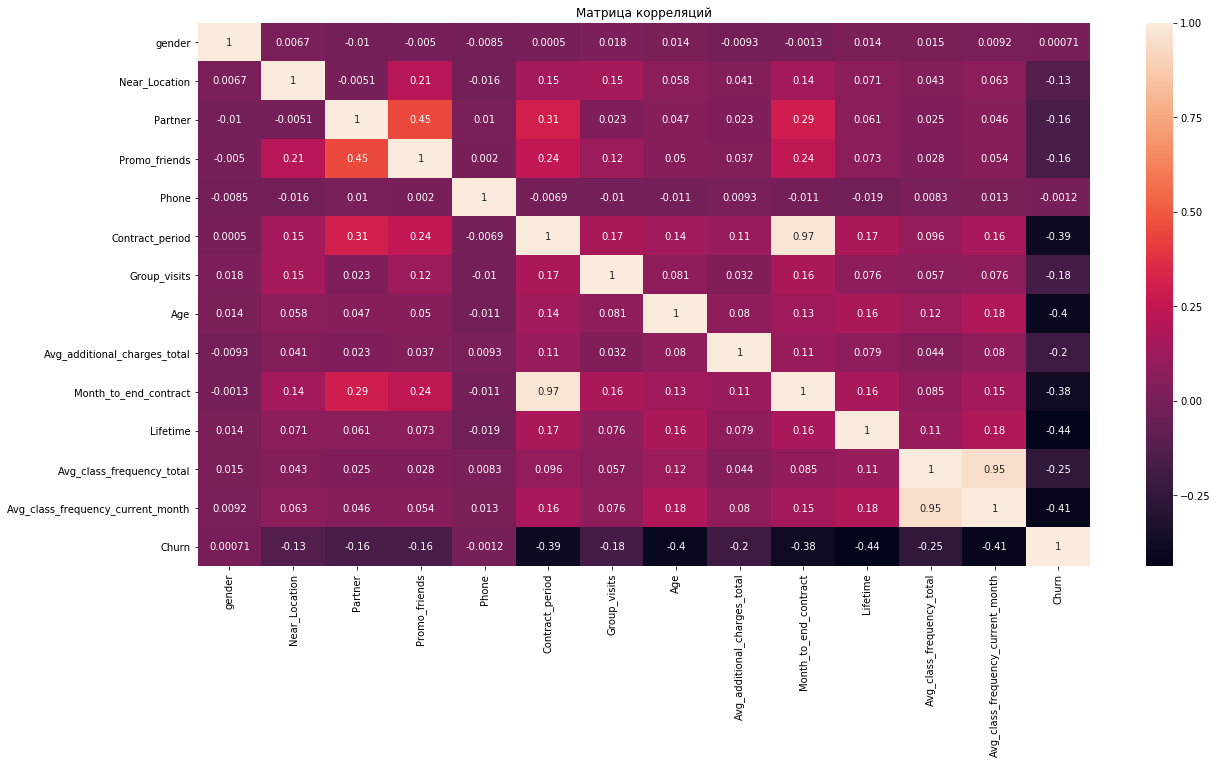

In [7]:
mcor = data.corr() 
plt.figure(figsize=(20, 10))
sns.heatmap(mcor, annot = True)
plt.title('Матрица корреляций')
plt.show()

Высокой линейной зависимость факта оттока от признаков не выявлено, при этом имеются мультиколлинеарные признаки - contract_period и month_to_end_contract, а так же Avg_class_frequency_total и Avg_class_frequency_current_month.  

### Вывод 

Распределение по полу не отличается, ближе живущие или работающие клиенты реже попадают в отток.
Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб, чем остальные клиенты. 
Клиенты, пришедшие по акции в два раза реже уходят в отток. 
Наличие мобильного номера клиента не влияет на группу клиента.
Средняя длительность договора больше у лояльных пользователей. 
На групповые занятия чаще ходят более лояльные пользователи. 
У групп есть небольшая разница в среднем возрасте клиентов
Есть небольшое различие в выручке от других услуг фитнес-центра
У клиентов в оттоке меньше среднее количество посещений в неделю
Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце. Для этого разобъем данные на обучающую и валидационную выборки

In [8]:
y = data['Churn']
X = data.drop(['Churn'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом. Перед обучением стандартизуем данные. 

In [9]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [10]:
model = LogisticRegression(random_state = 0,solver='liblinear')
model.fit(X_train_st, y_train)
pred = model.predict(X_test_st)

In [11]:
data_new = data.drop(['Avg_class_frequency_total', 'Month_to_end_contract'], axis = 1)
data_new.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.120078,0


In [12]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)
rf_model.fit(X_train_st, y_train)
y_pred = rf_model.predict(X_test_st)

Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. 

In [13]:
for o in [pred,y_pred]:
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, o)))
    print('Precision: {:.2f}'.format(precision_score(y_test, o)))
    print('Recall: {:.2f}'.format(recall_score(y_test, o)))

Accuracy: 0.92
Precision: 0.85
Recall: 0.83
Accuracy: 0.92
Precision: 0.84
Recall: 0.81


Доля верно угаданных ответов из всех прогнозов для обеих моделей равна 92%. Точность и полнота чуть выше в модели логистической регрессии. Таким образом, модель логистической регрессии показала себя лучше.

Посмотрим на коэффициенты признаков в оптимальной функции логистической регрессии.

In [14]:
features = pd.DataFrame(model.coef_.T, X.columns).reset_index()
features.columns = ['feature', 'coef']
features['coef'] = features['coef'].apply(lambda x: abs(x))
features = features.sort_values(by='coef', ascending=False)
features

,feature,coef
12,Avg_class_frequency_current_month,4.426492
10,Lifetime,3.720057
11,Avg_class_frequency_total,3.290506
7,Age,1.074359
5,Contract_period,0.703741
8,Avg_additional_charges_total,0.541020
9,Month_to_end_contract,0.520089
6,Group_visits,0.385778
3,Promo_friends,0.268180
2,Partner,0.082845


Самый высокий коэффициент у Avg_class_frequency_current_month (средняя частота посещений в неделю за предыдущий месяц), на втором месте Lifetime (время с момента первого обращения в фитнес-центр в месяцах) и на третьем Avg_class_frequency_total (средняя частота посещений в неделю за все время с начала действия абонемента)

### Вывод

Судя по метрикам модель логистической регрессии показала себя лучше. 92% правильно угаданных данных среди всех прогнозов, 85% правильно угаданных среди целевого класса(ущедщих в отток) и 83% объектов целевого класса модель смогла обнаружить.  
В целом показатели эффективности модели далеки от идеала. Возможно стоит попробывать другие методы предсказаний.

## Кластеризация клиентов

Построим матрицу расстояний на стандартизованной матрице признаков и нарисуем дендрограмму

Обучаем нормализатор и преобразуем набор данных

In [15]:
data_sc = scaler.fit_transform(data.drop(columns = ['Churn']))

Применяем функцию linkage() и выводим дендрограмму.

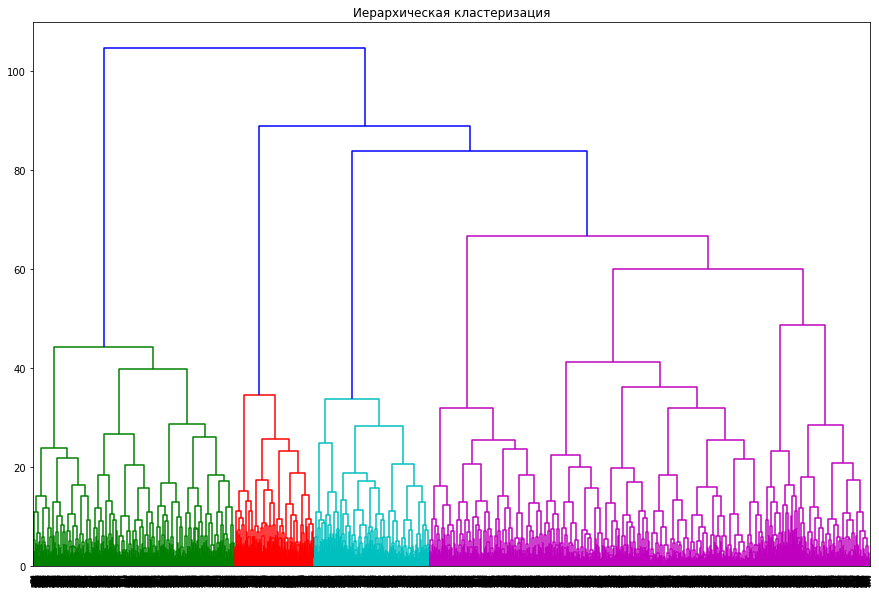

In [16]:
linked = linkage(data_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show() 

На дендрограмме явно выделены 4 кластера

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Договоримся за число кластеров принять n=5, по условиям ТЗ.

In [17]:
km = KMeans(n_clusters = 5, random_state=0) 
labels = km.fit_predict(data_sc) 
data['cluster_km'] = labels
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


Посмотрим на средние значения признаков для кластеров.

In [18]:
data.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


Кластер 0
Живут или работают недалеко от фитнес-центра
78% работают в компаниях-партнёрах клуба
Всех чаще посещают первый раз клуб по акции пригласи друга
Указывают номер телефона в анкете
Чаще других заключают договора на длительный срок - 12 месяцев
Чаще других кластеров посещают групповые занятия
В среднем посещают фитнес-центр 2 раза в неделю.
Отток 3% - самые лояльные клиенты.

Кластер 1
Живут или работают недалеко от фитнес-центра
47% работают в компаниях-партнёрах клуба
Не указывают мобильный телефон
В среднем 4.7 месяцев контрактов
В среднем посещают фитнес-центр 1-2 раза в неделю.
Отток - 27%

Кластер 2
Живут или работают в другом районе
Всего лишь 7% пришли по промо акции
Реже всех посещают групповые занятия
В среднем посещают фитнес-центр 1-2 раза в неделю
Отток - 44%

Кластер 3
Живут или работают недалеко от фитнес-центра
Указывают номер телефона в анкете
В основном обладатели недолгосрочных абонементов на 1-3 месяца
Наименьшее кол-во посещений за всё время и в последний месяц, примерно 1 раз в неделю
Отток - 51% - самый высокий

Кластер 4
Живут или работают недалеко от фитнес-центра
Указывают номер телефона в анкете
Чаще всех посещают клуб 2-3 раза в неделю
Заключают договора на 3-6 месяцев
Отток - 7%

Построим распределение признаков для кластеров.

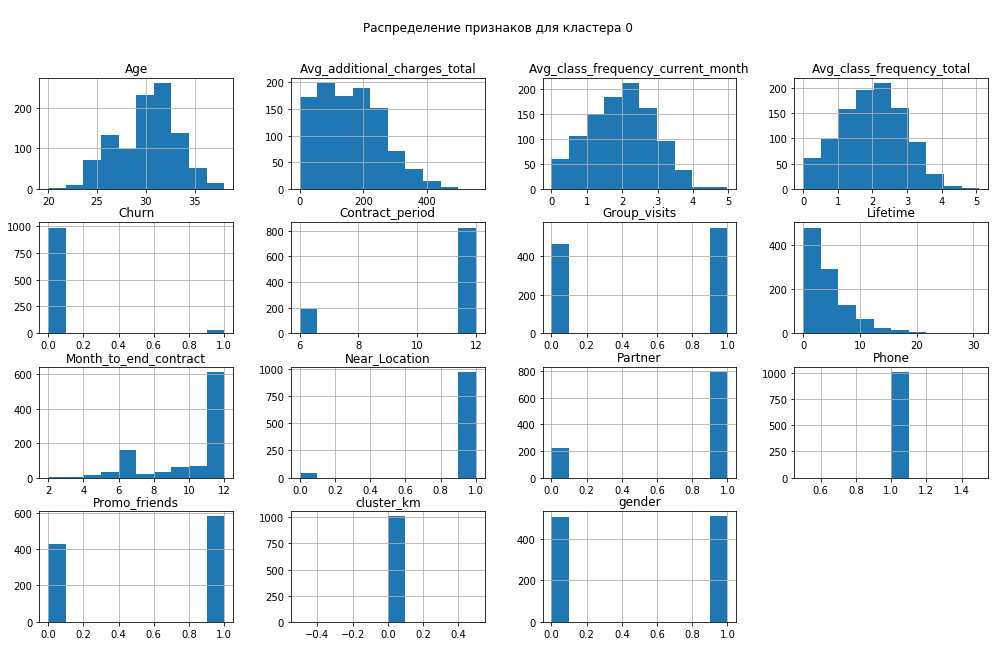

In [ ]:
for q in [0, 1, 2, 3, 4]:
    data[data['cluster_km']==q].hist(figsize=(17,10))
    plt.suptitle('\nРаспределение признаков для кластера {}'.format(q))
    plt.show()    

Выведем долю оттока для каждого кластера. 

In [ ]:
data.groupby('cluster_km')['Churn'].mean()

### Вывод

Самый низкий процент оттока у кластера 0, всего 3%. Клиенты этого кластера чаще других заключают договора на длительный срок - 12 месяцев, чаще других кластеров посещают групповые занятия, чаще посещают первый раз клуб по акции пригласи друга, в среднем посещают фитнес-центр 2 раза в неделю. Живут или работают недалеко от фитнес-центра и 78% работают в компаниях-партнёрах клуба
Отток 3% - самые лояльные клиенты.

Самый высокий процент оттока у клиентов кластера 1 - 52% Они живут или работают недалеко от фитнес-центра, в основном обладатели недолгосрочных абонементов на 1-3 месяца и редко посещают фитнес-центр примерно 1 раз в неделю

## Выводы и базовые рекомендации по работе с клиентами

Для того чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Был проведен анализ который показал следуюшие результаты:.
На текущий момент доля оттока по клиентам составляет 27%
Распределение по полу примерно одинаковое 
85% живет или работает рядом с фитнес-клубом
Примерно половина клиентов являются сотрудниками партнерских организаций
Около 30% клиентов пришли по программе "Приведи друга"
Известны мобильные номера примерно 90% клиентов
Средняя длительность абонементов клиентов - 4,7 месяцев
41% клиентов посещают групповые занятия
Средний возраст клиентов 29 лет

Была построена модель прогнозирования оттока клиентов. Её точность составляет 92%.

Так же были спрогнозированы 5 клиентских кластеров. На основе анализа их особенностей можно выделить следующие закономерности:
Половые различия не влияют на решение посещать фитнес-центр или нет
Ближе живущие или работающие клиенты реже попадают в отток
Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб
Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток
Чем больше средняя длительность договора, тем реже уходят в отток.
Количество посещений в предыдущий месяц в два раза ниже у клиентов,кто перестал посещать фитнес - центр

Рекомендации:

Используя модель предсказания плотно работать с клиентами, которые могут попасть в отток в следующем месяце.

Так же обращать особое внимание на клиентов кто посещает фитнес центр реже 2-х раз в неделю, это первый признак ухода клиента в отток.

Обратить особое внимание на клиентов - сотрудников компаний-партнеров, выявить причины ухода, предложить акции. 

Не тратить время менеджеров на клиентов кто не живет или не работает рядом с фитнес-клубом, скорее всего они будут посещать фитнес-центр не долго.

Напоминать посетителям об акции "приведи друга", возможно не все о ней знают

Повысить мотивацию менеджеров за реализацию долгосрочных абонементов на 12 месяцев

Разобраться почему в данных нет информации о клиентах с действием абонемента на 3 месяца. Это ошибка в данных или данный абонемент не пользуется популярностью.